# Entregável 1 - visão computacional

# Por Hugo Mendes e Jean Luca

In [21]:
%matplotlib inline
import math
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 2.4.11 


# Equalização de histograma

In [22]:
rintin = cv2.imread("RinTinTin.jpg")

In [23]:
rintin.shape

(240L, 320L, 3L)

In [24]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [25]:
rintin_gray.shape

(240L, 320L)

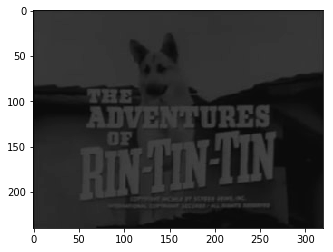

In [26]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

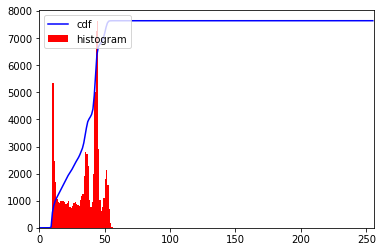

In [27]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

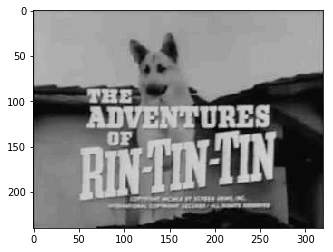

In [28]:
rintin_claro = rintin_gray

rintin_claro = rintin_gray - rintin_gray.min()

rintin_claro *= (255 / rintin_gray.max()) 




rintin_claro
plt.imshow(rintin_claro, cmap="Greys_r", vmin=0, vmax=255)

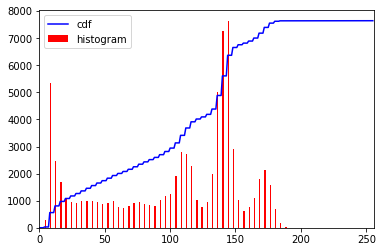

In [29]:
hist,bins = np.histogram(rintin_claro.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_claro.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [30]:
image = "hall_box_battery1.jpg"
foto = cv2.imread(image)
foto
foto.shape

(608L, 1080L, 3L)

C:\Users\Hugo\Anaconda3\envs\k27\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: overflow encountered in ubyte_scalars


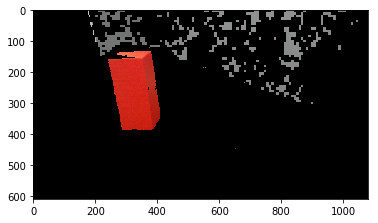

In [31]:
foto_rgb = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)
for i in range(len(foto_rgb)):
    for k in range(len(foto_rgb[i])):
        r,g,b = foto_rgb[i][k]
        if not (r-g >130 and r-b >120 and abs(b-g)>220):
            foto_rgb[i][k][0] = 0
            foto_rgb[i][k][1] = 0
            foto_rgb[i][k][2] = 0
            
            
plt.imshow(foto_rgb, vmin=0, vmax=255)

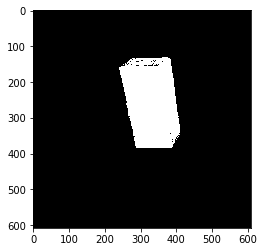

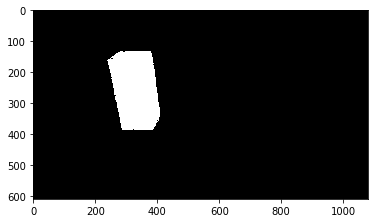

In [32]:
foto_rgb = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

low = [164,17,7]
high = [255,145,106]

#low = np.array(low)
#high = np.array(high)

#mask = cv2.inRange(foto_rgb,low,high)

foto = []
linha = []
for i in range(len(foto_rgb)):
    for k in range(len(foto_rgb)):
        temp = foto_rgb[i][k]
        foi = False
        if(temp[0] in range(low[0],high[0])) and(temp[1] in range(low[1],high[1])) and (temp[2] in range(low[2],high[2])):
            linha.append(255)
        else:
            linha.append(0)
    foto.append(linha)
    linha = []
foto = np.array(foto)

plt.imshow(foto, cmap="Greys_r",vmin=0, vmax=255)
plt.show()

low = np.array(low)
high = np.array(high)

mask = cv2.inRange(foto_rgb,low,high)

plt.imshow(mask, cmap="Greys_r",vmin=0, vmax=255)
plt.show()


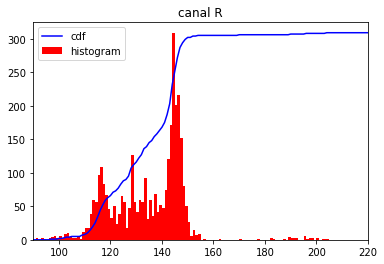

In [53]:
fotoR = foto_rgb[:][:][0]
hist,bins = np.histogram(fotoR.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()



plt.plot(cdf_normalized, color = 'b')
plt.hist(fotoR.flatten(),256,[0,256], color = 'r')
plt.xlim([90,220])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("canal R")
plt.show()

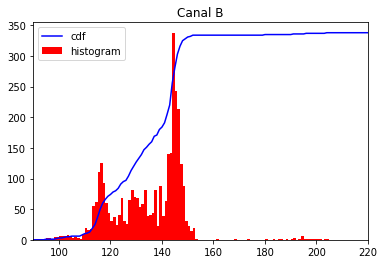

In [54]:
fotoB = foto_rgb[:][:][2]
hist,bins = np.histogram(fotoB.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()



plt.plot(cdf_normalized, color = 'b')
plt.hist(fotoB.flatten(),256,[0,256], color = 'r')
plt.xlim([90,220])
plt.title("Canal B")
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

É possivel indentificar as caixas olhando o histograma de cada canal. Como as caixas são basicamente só vermelho, e só azul, o canal r da caixa vermelha é bem alto, e o canal b da caixa azul tão alto quanto também. Logo se filtrarmos os dois histogramas para os respectivos canais com intensidade acima de 160, por exemplo, teremos a parte do histograma que se referem as caixas.

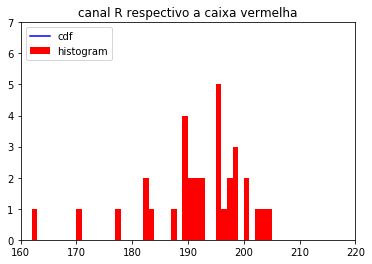

In [58]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(fotoR.flatten(),256,[0,256], color = 'r')
plt.xlim([160,220])
plt.ylim([0,7])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("canal R respectivo a caixa vermelha")
plt.show()

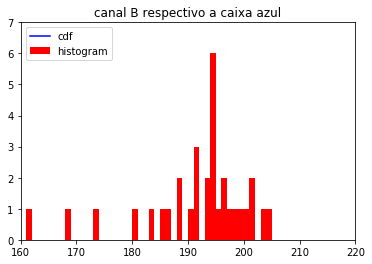

In [61]:
plt.plot(cdf_normalized, color = 'b')
plt.hist(fotoB.flatten(),256,[0,256], color = 'r')
plt.xlim([160,220])
plt.ylim([0,7])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("canal B respectivo a caixa azul")
plt.show()